## Theoretical Questions

1.  What is unsupervised learning in the context of machine learning

Ans- It’s a type of machine learning where the algorithm works on unlabeled data. The goal is to find hidden structures, patterns, or groups in the data without knowing the correct answers in advance. Clustering and dimensionality reduction are examples.

2. How does K-Means clustering algorithm work

Ans- 
1. Choose the number of clusters (k).

2. Initialize k centroids randomly (or using K-Means++).

3. Assign each data point to the closest centroid based on Euclidean distance.

4. Recompute centroids as the mean of all points assigned to them.

5. Repeat steps 3–4 until centroids no longer change significantly or maximum iterations are reached.
K-Means minimizes inertia (within-cluster sum of squares).

3.  Explain the concept of a dendrogram in hierarchical clustering

Ans- A dendrogram is a tree-like visualization that represents the merging or splitting of clusters in hierarchical clustering. Each leaf of the tree is an individual data point, and branches show how clusters are formed at different similarity/distance thresholds. Cutting the dendrogram at a chosen height gives the desired number of clusters.

4.  What is the main difference between K-Means and Hierarchical Clustering

Ans- 
K-Means: Requires k in advance, partitions data into spherical clusters, efficient for large datasets.
<br>
Hierarchical: No need for k initially, produces a hierarchy of clusters using dendrogram, but is computationally expensive (O(n²)).
Thus, K-Means is faster, while Hierarchical gives a full structure.

5. What are the advantages of DBSCAN over K-Means

Ans- <br>
1. Can detect clusters of arbitrary shapes (not just spherical).

2. Handles noise and outliers explicitly.

3. No need to predefine k (clusters are determined by density).

4. Works well on datasets with varying cluster sizes and densities, unlike K-Means.

6.  When would you use Silhouette Score in clustering

Ans- Silhouette Score evaluates clustering quality by measuring:

Cohesion: How close a point is to its own cluster.

Separation: How far it is from other clusters.
Values range from -1 to +1:

Close to +1 - well-clustered.

Around 0 - overlapping clusters.

Negative - misclassified.
Used to compare clustering models and choose optimal k.

7.  What are the limitations of Hierarchical Clustering

Ans- <br>
1. High computational complexity, unsuitable for very large datasets.

2. Sensitive to noise and outliers.

3. Once clusters are merged/split, it cannot be undone (greedy process).

4. Choosing the right linkage method affects results heavily.

8.  Why is feature scaling important in clustering algorithms like K-Means

Ans- K-Means uses Euclidean distance to assign points to clusters. If features are on different scales (e.g., age vs. income), larger-scale features dominate distance calculation. Scaling (standardization or normalization) ensures all features contribute equally to clustering.

9.  How does DBSCAN identify noise points

Ans-<br>
DBSCAN defines three point types:

1. Core points: At least minPts neighbors within ε.

2. Border points: Fewer than minPts neighbors but within a core’s neighborhood.

3. Noise points: Not a core and not reachable from a core.
Noise points are left unclustered.

10. Define inertia in the context of K-Means

Ans- Inertia is the sum of squared distances between each data point and its assigned cluster centroid. It measures cluster compactness. Lower inertia indicates tighter clusters but does not guarantee good separation between clusters.

11.  What is the elbow method in K-Means clustering

Ans- <br>The elbow method helps determine the optimal number of clusters (k).
Steps:

1. Run K-Means for different k values.

2. Plot k vs. inertia.

3. Look for the "elbow point" where the curve bends.
This point balances compactness and simplicity.

12. Describe the concept of "density" in DBSCAN

Ans- In DBSCAN, density refers to how many points exist within a region of radius ε. Dense regions form clusters if they have at least minPts neighbors. Sparse regions are considered noise. This allows DBSCAN to discover clusters of varying shapes.

13.  Can hierarchical clustering be used on categorical data

Ans- Yes, but Euclidean distance doesn’t work directly. Instead, specialized distance metrics like Hamming distance or Gower’s coefficient are used. These metrics handle categorical attributes effectively, enabling hierarchical clustering.

14.  What does a negative Silhouette Score indicate

Ans- It means a data point is closer to a neighboring cluster than its own assigned cluster. This suggests misclassification or overlapping clusters. Negative scores indicate poor clustering structure.

15.  Explain the term "linkage criteria" in hierarchical clustering

Ans- <br>
Linkage criteria decide how distances between clusters are measured when merging:

1. Single linkage: Nearest neighbor distance.

2. Complete linkage: Farthest neighbor distance.

3. Average linkage: Mean distance between all pairs.

4. Ward’s method: Minimizes variance increase when merging.

16.  Why might K-Means clustering perform poorly on data with varying cluster sizes or densities

Ans-<br> 
K-Means assumes:

1. Clusters are spherical.

2. Equal size and density.<br>
When clusters differ in size/density or overlap, K-Means misassigns points because centroids get biased toward larger/denser groups.

17.  What are the core parameters in DBSCAN, and how do they influence clustering

Ans-<br>
1. ε (eps): Radius around a point to consider neighbors.

2. minPts: Minimum points to form a dense region.<br>
A larger ε merges clusters, smaller ε detects fine clusters but may label more noise. Higher minPts increases density requirement.

18.  How does K-Means++ improve upon standard K-Means initialization

Ans- Standard K-Means random initialization may lead to poor clustering. K-Means++:

Selects the first centroid randomly.

Chooses subsequent centroids with probability proportional to their squared distance from existing centroids.
This spreads out initial centroids, improving convergence and accuracy.

19. What is agglomerative clustering

Ans- <br>
Agglomerative clustering is a bottom-up hierarchical approach:

1. Start with each point as a separate cluster.

2. Iteratively merge the closest clusters based on a linkage criterion.

3. Continue until one cluster remains.<br>
The result can be visualized using a dendrogram.

20. What makes Silhouette Score a better metric than just inertia for model evaluation

Ans- <br> 
<b>Inertia</b>: Only measures compactness within clusters, not separation.

<b>Silhouette Score</b>: Balances cohesion (tightness) and separation (distance from other clusters).
This provides a more reliable measure of clustering quality, especially for comparing models.

## Practical Questions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a 
scatter plot

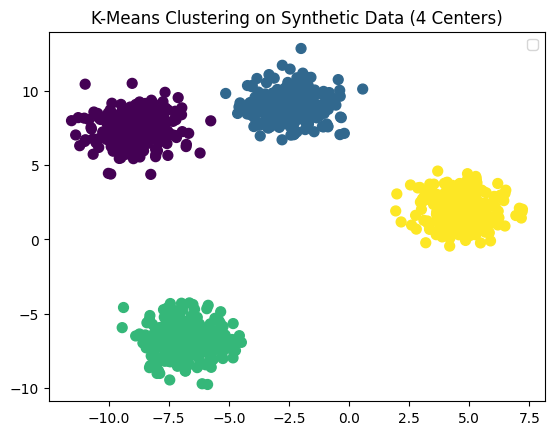

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

model = KMeans(n_clusters=4)
model.fit(X)
y_labels = model.predict(X)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y_labels, s=50, cmap="viridis")
plt.title("K-Means Clustering on Synthetic Data (4 Centers)")
plt.legend()
plt.show()

22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 
predicted labels

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

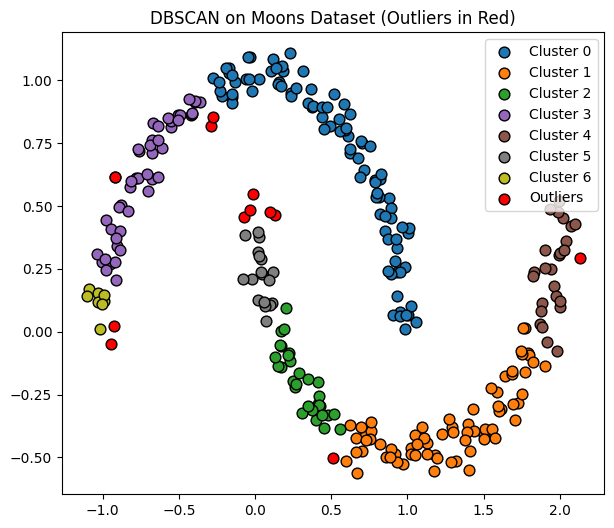

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

db = DBSCAN(eps=0.1, min_samples=5)
db.fit(X)
labels = db.labels_

unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(7, 6))

for k, col in zip(unique_labels, colors):
    mask = labels == k
    pts = X[mask]

    if k == -1:
        plt.scatter(pts[:, 0], pts[:, 1], c="red", s=60, edgecolors="k", label="Outliers")
    else:
        plt.scatter(pts[:, 0], pts[:, 1], c=[col], s=60, edgecolors="k", label=f"Cluster {k}")

plt.legend()
plt.title("DBSCAN on Moons Dataset (Outliers in Red)")
plt.show()

24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each 
cluster

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X, _ = load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=3)
labels = model.fit_predict(X_scaled)

cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

Cluster sizes:
0    51
1    65
2    62
Name: count, dtype: int64


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

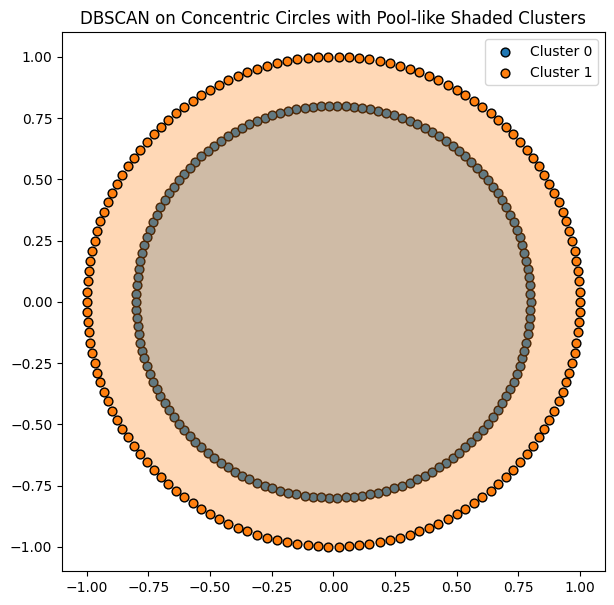

In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

X, _ = make_circles(n_samples=300, random_state=42)

db = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = db.labels_

unique_labels = set(labels)
colors = plt.cm.tab10(range(len(unique_labels)))

plt.figure(figsize=(7,7))

for k, col in zip(unique_labels, colors):
    mask = labels == k  
    pts = X[mask]

    if k == -1:
        plt.scatter(pts[:,0], pts[:,1], s=40, c="lightgray", edgecolors="k", label="Noise")
    else:
       if len(pts) >= 3:
            hull = ConvexHull(pts)
            plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],
                    alpha=0.3, color=col, edgecolor="none")
            plt.scatter(pts[:,0], pts[:,1], s=40, c=[col], edgecolors="k", label=f"Cluster {k}")

plt.legend()
plt.title("DBSCAN on Concentric Circles with Pool-like Shaded Clusters")
plt.show()

26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster 
centroids

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=data.feature_names)

print("Cluster Centroids:")
print(centroids_df)


Cluster Centroids:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0   

27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with 
DBSCAN

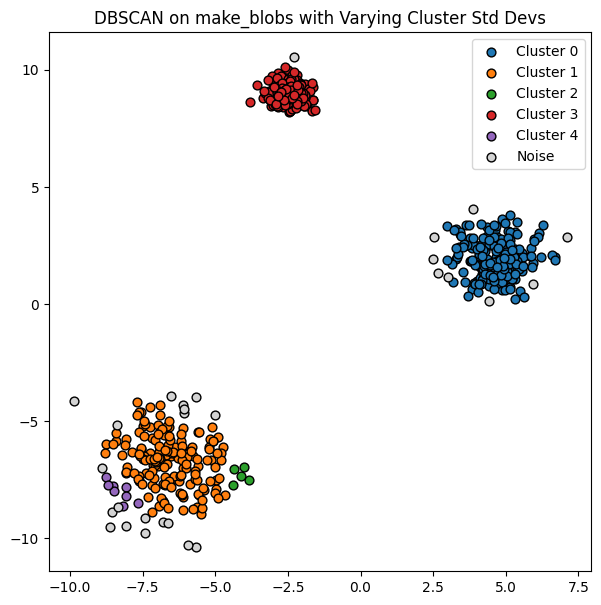

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=[0.4, 0.8, 1.2],
    random_state=42
)

db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

plt.figure(figsize=(7,7))

unique_labels = set(labels)
colors = plt.cm.tab10(range(len(unique_labels)))

for k, col in zip(unique_labels, colors):
    mask = labels == k
    pts = X[mask]

    if k == -1:
        # Noise
        plt.scatter(pts[:, 0], pts[:, 1], s=40, c="lightgray", edgecolors="k", label="Noise")
    else:
        plt.scatter(pts[:, 0], pts[:, 1], s=40, c=[col], edgecolors="k", label=f"Cluster {k}")

plt.title("DBSCAN on make_blobs with Varying Cluster Std Devs")
plt.legend()
plt.show()

28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

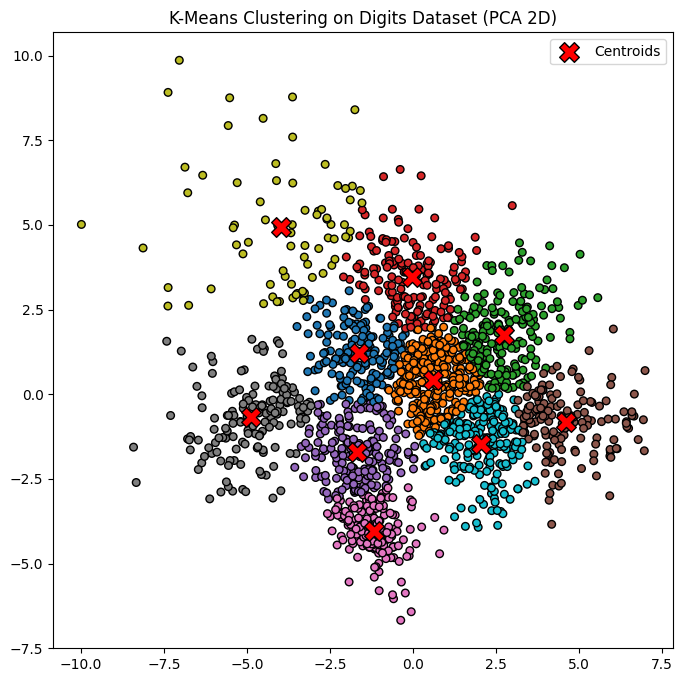

In [9]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = load_digits()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=10).fit(X_pca)
labels = kmeans.labels_

plt.figure(figsize=(8,8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=30, edgecolors="k")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", edgecolors="k", label="Centroids")

plt.title("K-Means Clustering on Digits Dataset (PCA 2D)")
plt.legend()
plt.show()

29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

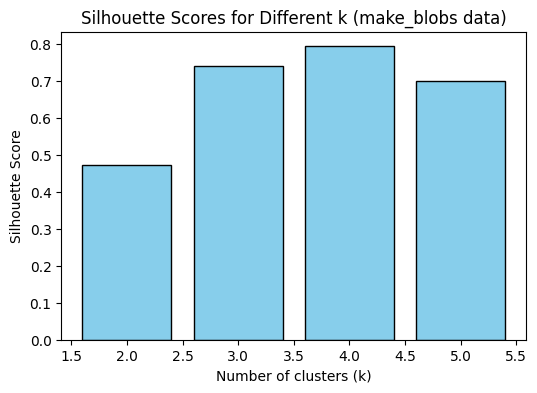

In [10]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=250, n_features=2, centers=4, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_coef = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coef.append(score)

plt.figure(figsize=(6,4))
plt.bar([2, 3, 4, 5], silhouette_coef, color="skyblue", edgecolor="k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k (make_blobs data)")
plt.show()

30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

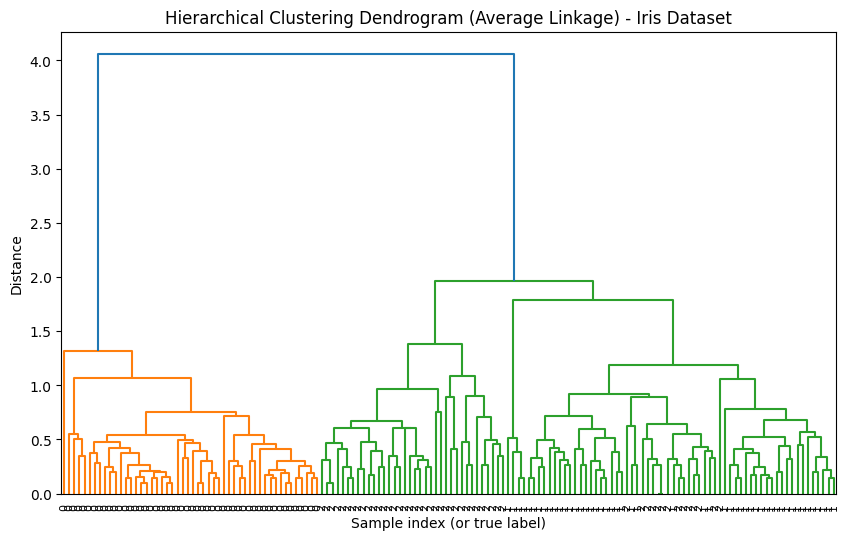

In [11]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample index (or true label)")
plt.ylabel("Distance")
plt.show()

31.  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with 
decision boundaries

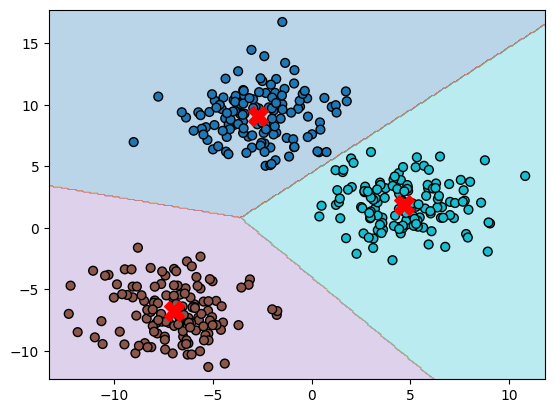

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=400, centers=3, cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", s=40, edgecolors="k")
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="X")
plt.show()

32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

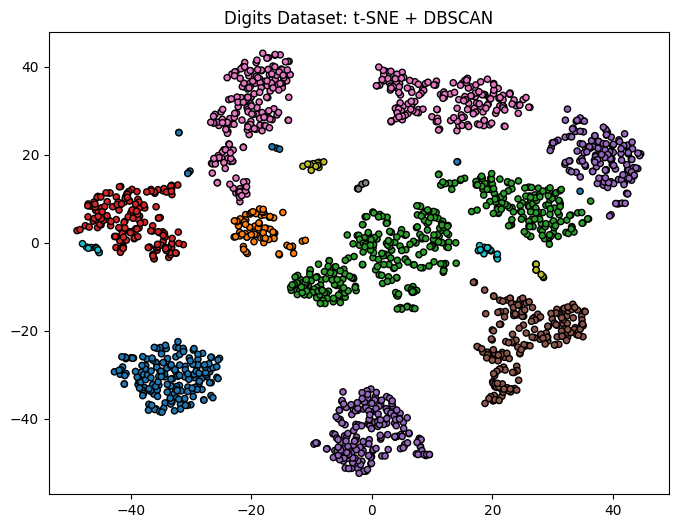

In [13]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)

X_2d = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

db = DBSCAN(eps=3, min_samples=5).fit(X_2d)
labels = db.labels_

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap="tab10", s=20, edgecolors="k")
plt.title("Digits Dataset: t-SNE + DBSCAN")
plt.show()

33.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot 
the result

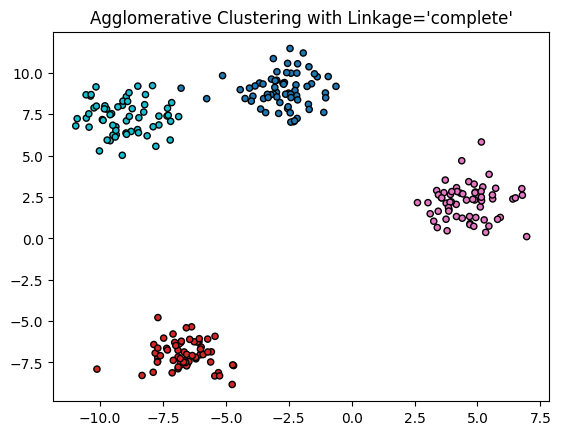

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(n_samples=250, n_features=2, centers=4, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
labels = agglo.labels_

plt.Figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, cmap="tab10", s=20, edgecolors="k")
plt.title("Agglomerative Clustering with Linkage='complete'")
plt.show()

34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a 
line plot

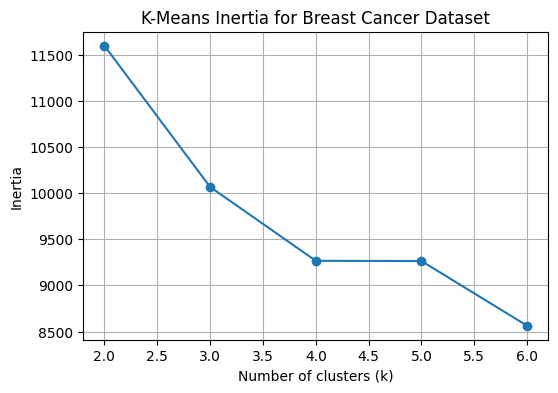

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

k_values = range(2, 7)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for Breast Cancer Dataset")
plt.grid(True)
plt.show()


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with 
single linkage

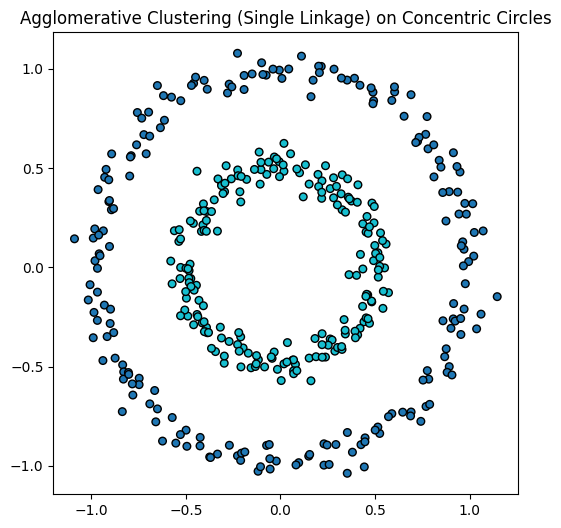

In [16]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage="single")
labels = agg.fit_predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", s=30, edgecolors="k")
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.show()

36.  Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding 
noise)

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = wine.data

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=3.5, min_samples=5).fit(X_scaled)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 1


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the 
data points

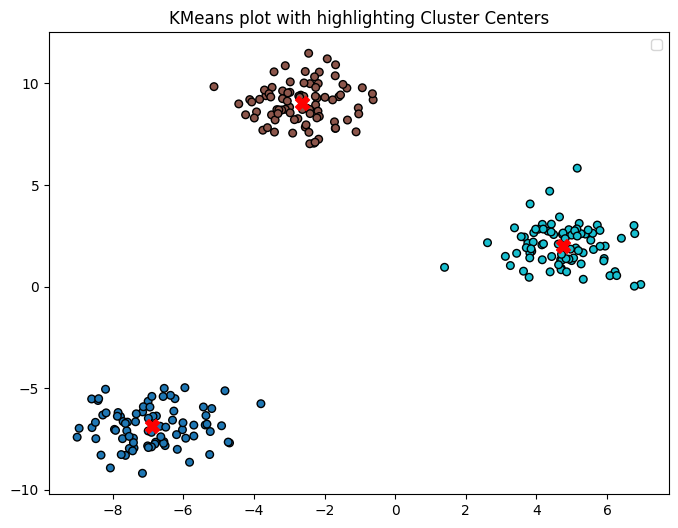

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=250, n_features=2, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3).fit(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=kmeans.labels_, cmap="tab10", s=30, edgecolors="k")
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='red', s=100, marker='X')
plt.title("KMeans plot with highlighting Cluster Centers")
plt.legend()
plt.show()

38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = load_iris()
X = data.data

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.8, min_samples=5).fit(X_scaled)

labels = db.labels_
noises = np.sum(labels == -1)
print(f"Total noise found using DBSCAN are {noises}")

Total noise found using DBSCAN are 4


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the 
clustering result

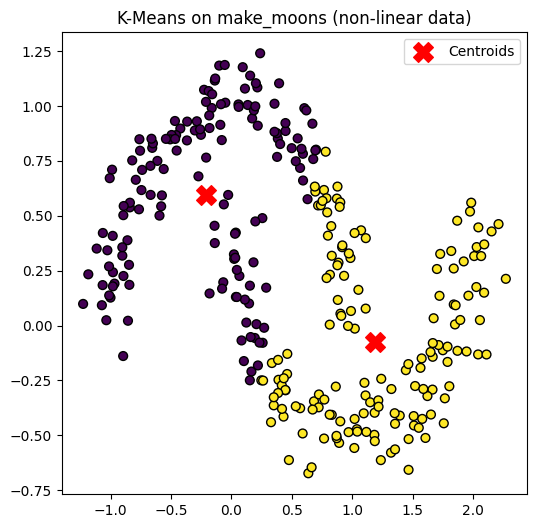

In [20]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=40, edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means on make_moons (non-linear data)")
plt.legend()
plt.show()

40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D 
scatter plot

In [ ]:
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    color=labels.astype(str),
    title="Digits Dataset - PCA (3D) with KMeans",
    opacity=0.7
)

fig.show()


41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the 
clustering

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=250, n_features=2, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, max_iter=300).fit(X)
labels = kmeans.labels_

score = silhouette_score(X, labels)
print(f"Silhouette Score for the k = 5 is {round(score, 4)}")

Silhouette Score for the k = 5 is 0.658


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. 
Visualize in 2D

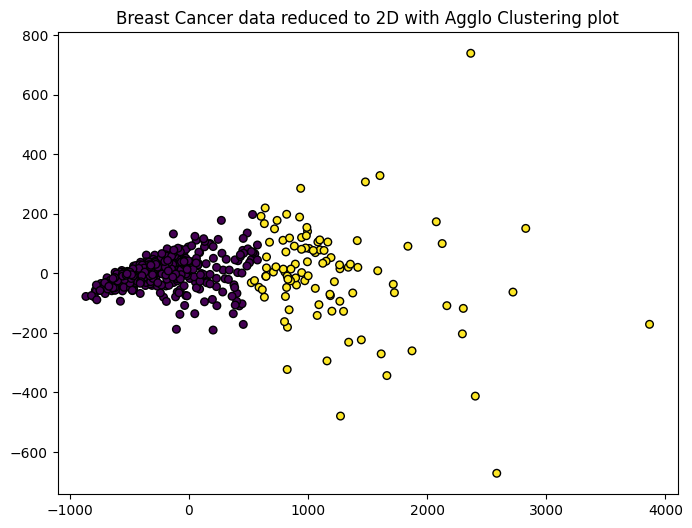

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

cancer = load_breast_cancer()
X = cancer.data

X_pca = PCA(n_components=2).fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2).fit(X_pca)
labels = agglo.labels_

plt.figure(figsize=(8, 6))
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=labels, s=30, edgecolors="k")
plt.title("Breast Cancer data reduced to 2D with Agglo Clustering plot")
plt.show()



43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN 
side-by-side

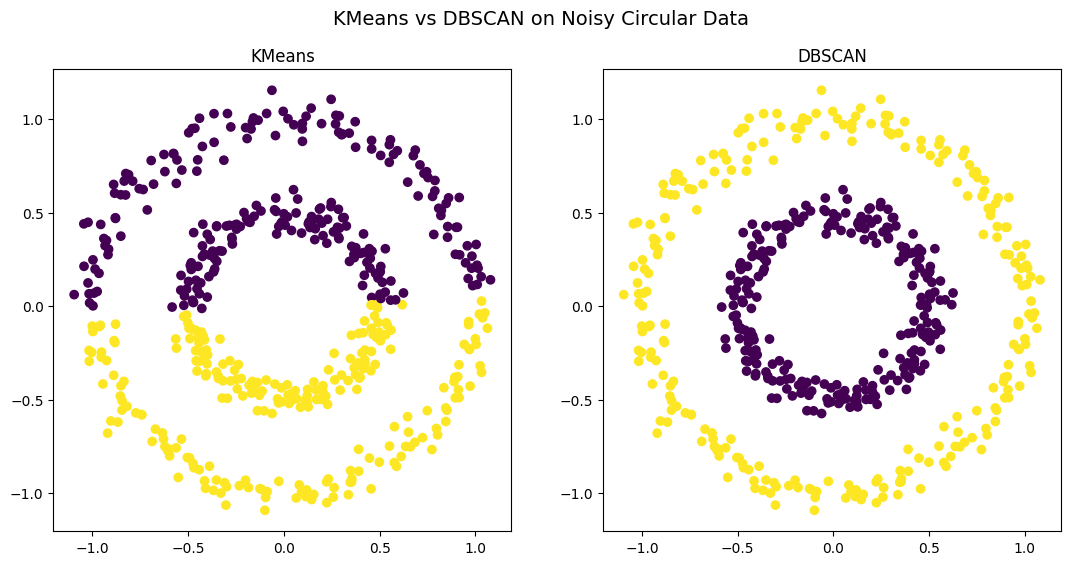

In [41]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(13, 6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap="viridis")
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels_dbscan, cmap="viridis")
plt.title("DBSCAN")

plt.suptitle("KMeans vs DBSCAN on Noisy Circular Data", fontsize=14)
plt.show()

44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

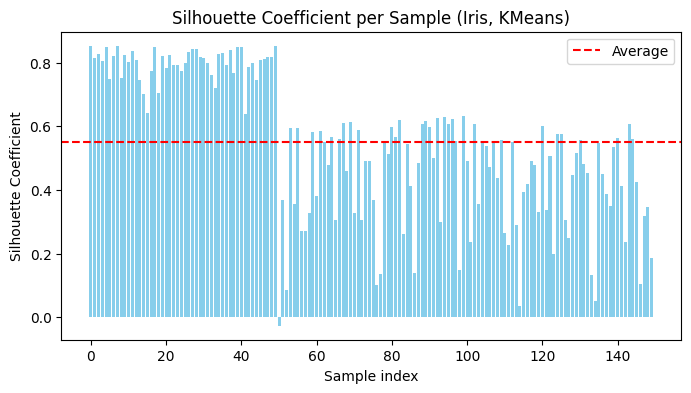

In [42]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

X = load_iris().data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

sil_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8,4))
plt.bar(range(len(sil_vals)), sil_vals, color="skyblue")
plt.axhline(y=sil_vals.mean(), color="red", linestyle="--", label="Average")
plt.title("Silhouette Coefficient per Sample (Iris, KMeans)")
plt.xlabel("Sample index")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.show()

45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. 
Visualize clusters

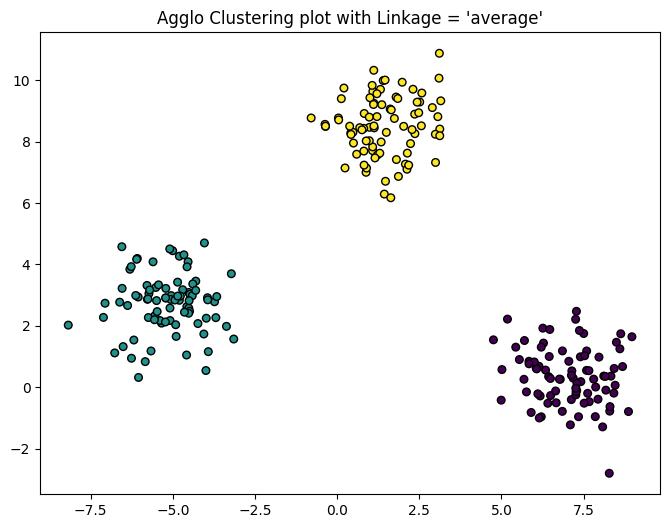

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=250, n_features=2, centers=3)

agglo = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
labels = agglo.labels_

plt.figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, s=30, edgecolors="k")
plt.title("Agglo Clustering plot with Linkage = 'average'")
plt.show()


46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 
features)

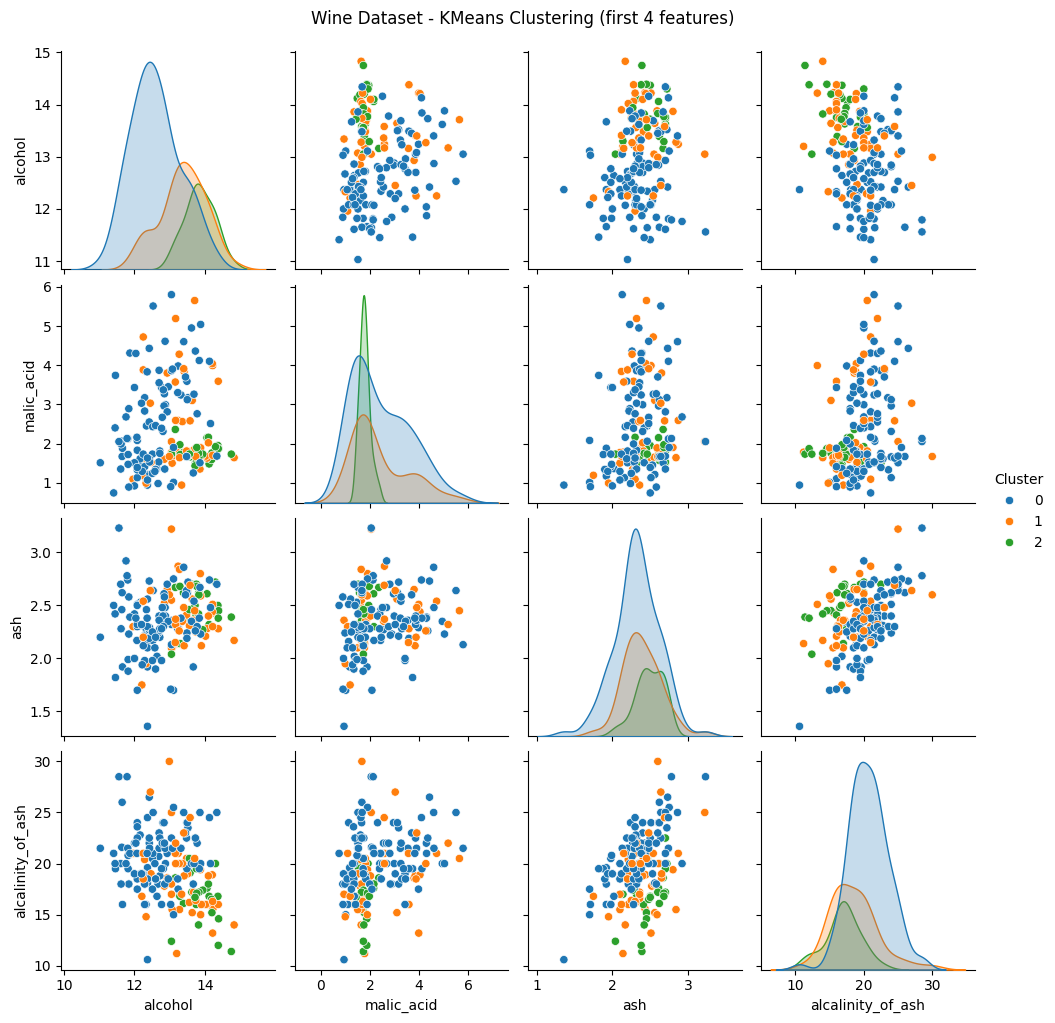

In [44]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

kmeans = KMeans(n_clusters=3, random_state=42)
X["Cluster"] = kmeans.fit_predict(X)

sns.pairplot(X.iloc[:, :4].join(X["Cluster"]), hue="Cluster", palette="tab10")
plt.suptitle("Wine Dataset - KMeans Clustering (first 4 features)", y=1.02)
plt.show()


47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the 
count

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)

Clusters found: 4
Noise points: 49


48.  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the 
clusters.

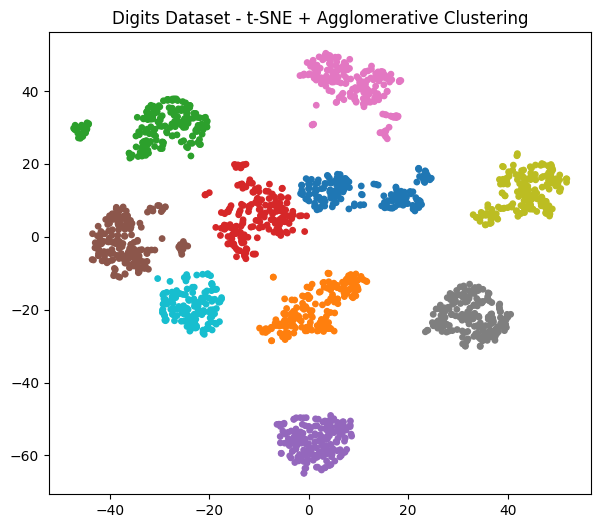

In [47]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap="tab10", s=15)
plt.title("Digits Dataset - t-SNE + Agglomerative Clustering")
plt.show()